In [1]:
#Please run this first


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
# from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


#import modules

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
from statsmodels.base.model import GenericLikelihoodModel
from sklearn.model_selection import train_test_split
from scipy import spatial
import copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ratings_small = pd.read_csv('ratings_small.csv',header = 0)
ratings_small = ratings_small.drop(columns = 'Unnamed: 0')
ratings_small = ratings_small.drop(columns = 'timestamp')
ratings_small.head()


,userId,movieId,rating
0,31,83613,5.0
1,31,84944,4.0
2,31,85510,4.0
3,31,86332,5.0
4,31,86880,5.0


In [3]:
avg_movies_watched = ratings_small["userId"].value_counts().mean()
avg_movies_watched

18.213443396226417

In [4]:
User = ratings_small["userId"].value_counts().index.tolist()
Count = ratings_small["userId"].value_counts().tolist()

In [5]:
len(User)

848

In [ ]:
#avg_movies_watched = ratings_small["userId"].value_counts().mean()

#for i in Count:
#    if i < avg_movies_watched:
#        ind = Count.index(i)
#        break
#ST_User = User[:ind]
#len(ST_User)

### Initial Split

In [ ]:
# dict_train = {}
# dict_test = {}
# for i in ST_User:
#     Filter = ratings_small["userId"] == i
    
#     List = []
#     for j in ratings_small[Filter]["movieId"]:
#         List.append(j)
        
#     if len(List)>1:
        
#         train, test = train_test_split(List, test_size=0.30, random_state=42)
#         dict_train[i] = train
#         dict_test[i] = test
    
#     else:
#         pass

### 3 movies in test set 

In [8]:
dict_train = {}
dict_test = {}
for i in User:
    Filter = ratings_small["userId"] == i
    
    List = []
    for j in ratings_small[Filter]["movieId"]:
        List.append(j)
        
    if len(List)>4:
        
        test = np.random.choice(List,3).tolist()
        dict_test[i] = test
        dict_train[i] = [i for i in List if i not in test]
        

    else:
        pass
    

In [11]:
len(dict_train.keys())

490

In [ ]:
# create user_genre first in each loop for the 70% movies of the user we are predicting rating for
movies_small = pd.read_csv('movies_small.csv',header = 0)
movies_small = movies_small.drop(columns = 'Unnamed: 0')
movies_small.head()

,movieId,title,genres,name,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83349,"Green Hornet, The (2011)","['Action', 'Comedy', 'Crime', 'Fantasy', 'Thri...","Green Hornet, The",2011,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83480,Season of the Witch (2011),"['Adventure', 'Drama', 'Fantasy']",Season of the Witch,2011,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,83613,Cowboys & Aliens (2011),"['Action', 'Sci-Fi', 'Thriller', 'Western', 'I...",Cowboys & Aliens,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,83910,"Dilemma, The (2011)","['Comedy', 'Drama']","Dilemma, The",2011,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Filter = 
# movie_ratings = movies_small.merge(ratings_small[ratings_small[""]], on = 'movieId')
ratings_small.head(10)
# print(len(ST_User))
# ratings_small.loc[ST_User]
ratings_small_stuser = ratings_small[ratings_small["userId"].isin(User)]

In [ ]:
ratings_small_stuser[ratings_small_stuser["userId"]==1065]

,userId,movieId,rating
2692,1065,86332,1.0
2693,1065,87232,4.0
2694,1065,89745,4.5
2695,1065,89864,4.5
2696,1065,89904,0.5
2697,1065,90888,2.5
2698,1065,91529,3.5
2699,1065,91658,4.5
2700,1065,91976,3.0
2701,1065,92420,4.0


In [ ]:
ratings_small_train = pd.DataFrame()
for i in list(dict_train.keys()):
    inter = ratings_small_stuser[ratings_small_stuser["userId"]==i]
    Filter = inter[inter["movieId"].isin(dict_train.get(i))]
    ratings_small_train = pd.concat([ratings_small_train,Filter])

In [ ]:
ratings_small_train.head()
# ratings_small_train["userId"].unique().shape

,userId,movieId,rating
6421,3029,83613,2.5
6422,3029,84374,3.0
6423,3029,84392,2.5
6424,3029,84395,1.5
6425,3029,84637,3.0


In [ ]:
movie_ratings_train = movies_small.merge(ratings_small_train, on = 'movieId')

In [ ]:
movie_ratings_train = movie_ratings_train.drop('(no genres listed)',axis =1)
movie_ratings_train.head()

,movieId,title,genres,name,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,userId,rating
0,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2568,2.5
1,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2657,3.0
2,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2898,4.0
3,82152,Beastly (2011),"['Drama', 'Fantasy', 'Romance']",Beastly,2011,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5443,2.0
4,83349,"Green Hornet, The (2011)","['Action', 'Comedy', 'Crime', 'Fantasy', 'Thri...","Green Hornet, The",2011,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,843,1.0


In [ ]:
movie_ratings_train = movie_ratings_train.drop(['title', 'name', 'year', 'genres', 'movieId'],axis=1)

In [ ]:
movie_ratings_train['Action'] = movie_ratings_train['Action']*movie_ratings_train['rating']
movie_ratings_train['Adventure'] = movie_ratings_train['Adventure']*movie_ratings_train['rating']
movie_ratings_train['Animation'] = movie_ratings_train['Animation']*movie_ratings_train['rating']

movie_ratings_train['Children'] = movie_ratings_train['Children']*movie_ratings_train['rating']
movie_ratings_train['Comedy'] = movie_ratings_train['Comedy']*movie_ratings_train['rating']
movie_ratings_train['Crime'] = movie_ratings_train['Crime']*movie_ratings_train['rating']

movie_ratings_train['Documentary'] = movie_ratings_train['Documentary']*movie_ratings_train['rating']
movie_ratings_train['Drama'] = movie_ratings_train['Drama']*movie_ratings_train['rating']

movie_ratings_train['Fantasy'] = movie_ratings_train['Fantasy']*movie_ratings_train['rating']
movie_ratings_train['Film-Noir'] = movie_ratings_train['Film-Noir']*movie_ratings_train['rating']

movie_ratings_train['Horror'] = movie_ratings_train['Horror']*movie_ratings_train['rating']

movie_ratings_train['IMAX'] = movie_ratings_train['IMAX']*movie_ratings_train['rating']

movie_ratings_train['Musical'] = movie_ratings_train['Musical']*movie_ratings_train['rating']
movie_ratings_train['Mystery'] = movie_ratings_train['Mystery']*movie_ratings_train['rating']

movie_ratings_train['Romance'] = movie_ratings_train['Romance']*movie_ratings_train['rating']

movie_ratings_train['Sci-Fi'] = movie_ratings_train['Sci-Fi']*movie_ratings_train['rating']

movie_ratings_train['Thriller'] = movie_ratings_train['Thriller']*movie_ratings_train['rating']

movie_ratings_train['War'] = movie_ratings_train['War']*movie_ratings_train['rating']
movie_ratings_train['Western'] = movie_ratings_train['Western']*movie_ratings_train['rating']

user_id_list = list(movie_ratings_train['userId'].unique())
# len(user_id_list)

In [ ]:
#movie_ratings_train[movie_ratings_train == 0.0] = np.nan

In [ ]:
user_rating_dict = {}

for i in user_id_list:
  #user_rating_dict[i] = np.nansum(movie_ratings_train[movie_ratings_train['userId'] == i])/np.count_nonzero(movie_ratings_train[movie_ratings_train['userId'] == i])
  #user_rating_dict[i] = (movie_ratings_train[movie_ratings_train['userId'] == i]).nanmean()
  user_rating_dict[i] = (movie_ratings_train[movie_ratings_train['userId'] == i]).mean()

user_genre_train = pd.DataFrame(user_rating_dict)

user_genre_train= user_genre_train.T

user_genre_train= user_genre_train.drop(['rating', 'userId'],axis=1)

In [ ]:
user_genre_train.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir
2568,0.607724,0.113821,0.079268,0.983740,0.323171,0.500000,1.260163,1.010163,0.451220,0.670732,0.258130,0.176829,0.676829,0.556911,0.016260,0.063008,0.044715,0.020325,0.008130
2657,1.478261,0.195652,0.190217,0.559783,0.728261,0.228261,1.375000,2.152174,0.407609,1.043478,0.119565,0.255435,1.250000,1.423913,0.000000,0.239130,0.076087,0.108696,0.038043
2898,0.678571,0.000000,0.042857,1.671429,0.335714,0.514286,1.428571,1.235714,0.664286,1.450000,0.092857,0.407143,0.550000,0.457143,0.000000,0.135714,0.000000,0.000000,0.050000
5443,0.961538,0.000000,0.000000,0.961538,0.461538,0.461538,2.115385,1.769231,0.846154,0.576923,0.000000,0.000000,0.615385,0.615385,0.346154,0.000000,0.000000,0.000000,0.000000
843,0.189655,0.063218,0.026820,0.595785,0.162835,0.293103,1.258621,0.423372,0.385057,0.469349,0.044061,0.055556,0.212644,0.180077,0.157088,0.038314,0.022989,0.011494,0.015326


In [ ]:
user_genre = pd.read_csv('user_genre.csv',header = 0)
user_genre = user_genre.rename(columns={"Unnamed: 0":"userId"})
user_genre = user_genre.set_index('userId')

In [ ]:
user_genre.loc[[1065]]

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
1065,1.777778,0.972222,0.0,0.0,1.0,0.194444,0.0,1.194444,0.361111,0.0,0.527778,0.972222,0.0,0.0,0.138889,1.305556,1.222222,0.222222,0.0


In [ ]:
dict_test

{31: [87430, 87232, 86332],
 71: [109374, 106100, 106920],
 82: [89118, 87222, 88140],
 85: [92259, 89745, 97921],
 96: [94070, 97938, 112623],
 98: [84944, 96610, 96610],
 107: [108932, 102903, 108932],
 133: [97921, 94959, 104272],
 136: [88125, 106696, 91529],
 162: [97304, 84944, 102445],
 182: [88744, 90249, 87867],
 208: [105504, 88744, 92152],
 213: [99114, 97304, 103335],
 215: [114601, 94466, 103335],
 248: [100737, 89087, 91630],
 260: [112556, 112852, 112556],
 271: [91529, 106489, 91658],
 279: [90746, 90746, 91542],
 284: [128488, 112556, 88129],
 285: [96079, 98809, 99813],
 318: [96737, 95510, 108983],
 342: [99114, 98154, 98154],
 348: [88235, 86190, 93287],
 359: [87430, 86644, 86332],
 370: [104879, 97225, 87520],
 398: [104879, 89492, 98961],
 409: [86332, 88140, 86882],
 425: [99114, 89759, 109487],
 440: [88744, 90746, 88125],
 455: [101525, 105028, 99917],
 459: [91542, 92768, 97186],
 466: [97921, 106642, 87222],
 469: [89759, 84152, 95558],
 482: [86817, 88810, 

In [ ]:
user_genre_train.head(1)
movies_small.columns

Index(['movieId', 'title', 'genres', 'name', 'year', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War',
       'Musical', 'Western', 'Film-Noir', '(no genres listed)'],
      dtype='object')

In [ ]:
movies_small= movies_small.set_index('movieId')
movies_genre = movies_small.drop(columns=['title', 'genres', 'name', 'year','(no genres listed)'])
movies_genre.head(5)

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,
82152,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83349,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
83480,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
83910,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dict_pred_rating = {}
for i in list(dict_test.keys()):
    test_movies_pred = {}
    for j in dict_test.get(i):
        
        pred_ratings = np.sum(user_genre_train.loc[i]*movies_genre.loc[j])/np.count_nonzero(movies_genre.loc[j])
        #if i == 31 and j == 86332:
          #print(user_genre_train.loc[i],movies_genre.loc[j],user_genre_train.loc[i]*movies_genre.loc[j])
          #break
        #else: continue
        test_movies_pred[j] = pred_ratings
    dict_pred_rating[i] = test_movies_pred

In [ ]:
dict_pred_rating[31]

{86332: 2.1136363636363638,
 87232: 1.8545454545454547,
 87430: 2.606060606060606}

In [ ]:
dict_test_rating = copy.deepcopy(dict_pred_rating)
for i in list(dict_pred_rating.keys()):
    movie_rating = {}
    for j in dict_pred_rating.get(i):
        test_rating = float(ratings_small[ratings_small["userId"] == i][ratings_small["movieId"] == j]["rating"])
        movie_rating[j] = test_rating
        dict_test_rating[i] = movie_rating

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
dict_test_rating[31]
dict_train[31]

[83613,
 84944,
 85510,
 86880,
 86911,
 87222,
 88125,
 88140,
 88744,
 89745,
 91500,
 91529,
 95167,
 98809,
 102125,
 102445,
 106487,
 106489,
 106696,
 112852,
 118696,
 125916]

In [ ]:
count = 0
sum_ = 0
for i in list(dict_pred_rating.keys()):                              # user we're predicting movie rating for
    for j in list(dict_pred_rating.get(i).keys()):
        count += 1
        diff = dict_pred_rating.get(i).get(j) - dict_test_rating.get(i).get(j)
        squared = diff**2
        sum_ += squared

ST_rmse_DCF = (sum_/count)**(1/2)

ST_rmse_DCF

2.638092512253927

In [ ]:
numvsrmse = {}
for i in range(1, 400):
    numvsrmse[i] = []


In [ ]:


for i in list(dict_pred_rating.keys()):                              # user we're predicting movie rating for
    for j in list(dict_pred_rating.get(i).keys()):

        diff = dict_pred_rating.get(i).get(j) - dict_test_rating.get(i).get(j)
        squared = diff**2
        
        numwatched = len(dict_train.get(i))
        numvsrmse[numwatched].append(squared)
        sum_ += squared

        
            
for i in list(numvsrmse.keys()):
    list_ = numvsrmse.get(i)
    avg = np.mean(list_)
    numvsrmse[i] = avg**(1/2)
    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
numvsrmse

{1: nan,
 2: 2.429379397965509,
 3: 2.611147988455435,
 4: 2.856082458088758,
 5: 2.9012195252406783,
 6: 2.465524598015861,
 7: 2.5957948248378067,
 8: 2.441459738555476,
 9: 2.8009159810046897,
 10: 2.3516598916577514,
 11: 2.4406083004289414,
 12: 2.4927127854543825,
 13: 2.746386555360923,
 14: 2.5447247907335275,
 15: 2.8159852513741597,
 16: 2.5059537801834653,
 17: 2.7594724481095665,
 18: 2.747909348402352,
 19: 2.5941681376780332,
 20: 2.8673165781908176,
 21: 2.9349439814959317,
 22: 2.4198540121426015,
 23: 2.607577703734776,
 24: 2.745222335826033,
 25: 2.3674733735785023,
 26: 2.145378287733827,
 27: 2.6053237464712717,
 28: 2.7381049071027808,
 29: 3.281288776621732,
 30: 2.661488408844104,
 31: 2.588968855003554,
 32: 2.450291212194734,
 33: 1.6979750033482162,
 34: 2.997190686767798,
 35: 2.91455741030421,
 36: 2.6356872922718773,
 37: 3.885460229250195,
 38: 2.8519647470131186,
 39: 2.7945517466001837,
 40: 2.61221731286683,
 41: 2.7135392214833196,
 42: 2.098643862300

In [ ]:
df_numvsrmse = pd.DataFrame.from_dict(numvsrmse,orient = "index",columns =['RMSE'])

In [ ]:
df_numvsrmse = df_numvsrmse.dropna()

In [ ]:
df_numvsrmse.columns


Index(['RMSE'], dtype='object')

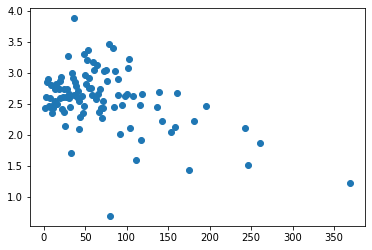

In [ ]:

x, y = df_numvsrmse.index, df_numvsrmse['RMSE']

x = pd.Series(x)
y = pd.Series(y)
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, 'o')
plt.show()

In [ ]:
avg_baseline_rmse = np.mean(df_numvsrmse['RMSE'])
avg_baseline_rmse


2.5860300024972194

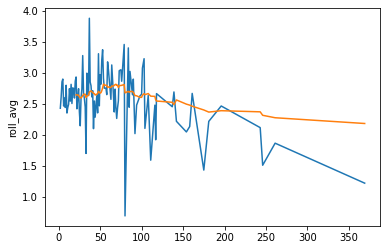

In [ ]:
df_numvsrmse = df_numvsrmse.assign(roll_avg = df_numvsrmse['RMSE'].rolling(20).mean())
import seaborn as sns;
ax = sns.lineplot(x=df_numvsrmse.index, y="RMSE", data=df_numvsrmse)
ax = sns.lineplot(x=df_numvsrmse.index, y="roll_avg", data=df_numvsrmse)

In [ ]:
df_numvsrmse = df_numvsrmse.assign(method = 'baseline')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install datetime
import datetime as dt
now = dt.datetime.now() # current date and time

curr_time = now.strftime("%Y_%m_%d_%H_%M_%S")

curr_time

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 235kB 6.9MB/s 


'2020_08_28_03_32_32'

In [ ]:
df_numvsrmse.to_csv("/content/drive/My Drive/BA_Project/Final/baseline/baseline_rmse"+curr_time+".csv")

In [ ]:
import pickle
pickle.dump( dict_pred_rating, open( "/content/drive/My Drive/BA_Project/Final/baseline/dict_rating_"+ curr_time+".p", "wb" ) )
pickle.dump( dict_test_rating, open( "/content/drive/My Drive/BA_Project/Final/baseline/dict_test_rating_"+ curr_time+".p", "wb" ) )
pickle.dump( dict_test, open( "/content/drive/My Drive/BA_Project/Final/baseline/dict_test_"+ curr_time+".p", "wb" ) )
pickle.dump( dict_train, open( "/content/drive/My Drive/BA_Project/Final/baseline/dict_train_"+ curr_time+".p", "wb" ) )
